# Dynamic Time Warping

In [ ]:
# Install yfinance package. 
!pip install yfinance 
!pip install fastdtw

In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [2]:
# constants
today = '2022-01-01'
ticker_dct = {
    'SHOP' : ['2015-05-22',today],
    'COIN' : ['2021-04-16',today],
    'DOCN' : ['2021-03-26',today],
    'BMBL' : ['2021-02-12',today],
    'COUR' : ['2021-04-01',today],
    'DUOL' : ['2021-07-30',today]
}

## Import Data

In [3]:
def fetch_stock_data(ticker_dct):
    '''
    This function will fetch stock data through the yahoo finance
    stock api.
    The ticker_dct will be of the following format : 
        - Key -> Ticker 
        - Values -> Start date, end date of the stock data
    
    params:
        ticker_dct (Dictionary) : The stocks you want to fetch the data for
        
    returns:
        This funciton will return a dictionary, the key will be the ticker
        and the value will be the data associated to that ticker over the
        specified user time period
    '''
    
    for k,v in ticker_dct.items():
        ticker_dct[k] = yf.download(k, v[0], v[1])
    return ticker_dct

In [4]:
dfs = fetch_stock_data(ticker_dct)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Find Stocks Similar to Shopify

In [ ]:
benchmark = np.array(dfs['SHOP'].Close.values)

array([  28.30999947,   29.64999962,   27.5       , ..., 1392.07995605,
       1398.23999023, 1377.39001465])

In [ ]:
distance, path = fastdtw(x, y, dist=euclidean)


## Implement DTW

In [5]:
def dtw(x,y):
    '''
    This function will calculate the cost matrix of two time series using the
    DTW formulation.
    
    params:
        x (Numpy Array) : The first time series
        y (Numpy Array) : The second time series
        
    returns:
        The cost matrix associated to the two time series.
        
    example:
        x = np.array([0,2,0,1,0, -1, 1])
        y = np.array([0,1,-1,-0,2,-1,0])
        dtw(x,y)
    '''
    n, m = len(x), len(y)
    
    # generate & initialize cost matrix
    cost_mat = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            if i == 0 and j == 0:
                cost_mat[i,j] = 0
            else:
                cost_mat[i,j] = np.inf

    # Fill the cost matrix 
    for i in range(1, n+1):
        for j in range(1, m+1):
            c = abs(x[i-1] - y[j-1])
            _min = min([cost_mat[i-1,j-1], cost_mat[i-1,j], cost_mat[i, j-1]])
            cost_mat[i,j] = c + _min
    return cost_mat    

In [7]:
x = np.array([0.5, 21, 34, 5, 2, 4, 2, 0])
y = np.array([5, 42, 23, 4, 2, 4, 5, 3, 2, 1, 30, 0,0])
res = dtw(x,y)

In [44]:
def visualize_close_prices(d):
    '''
    This function will visualize the closing prices associated
    to a given input dataframe
    '''
    if type(d) == list:
        plt.subplots(1,len(d), figsize = (20,7))
        for ax,stock in enumerate(d):
            stock.Close.plot()
        plt.show()
    else:
        d.Close.plot()
        plt.show()

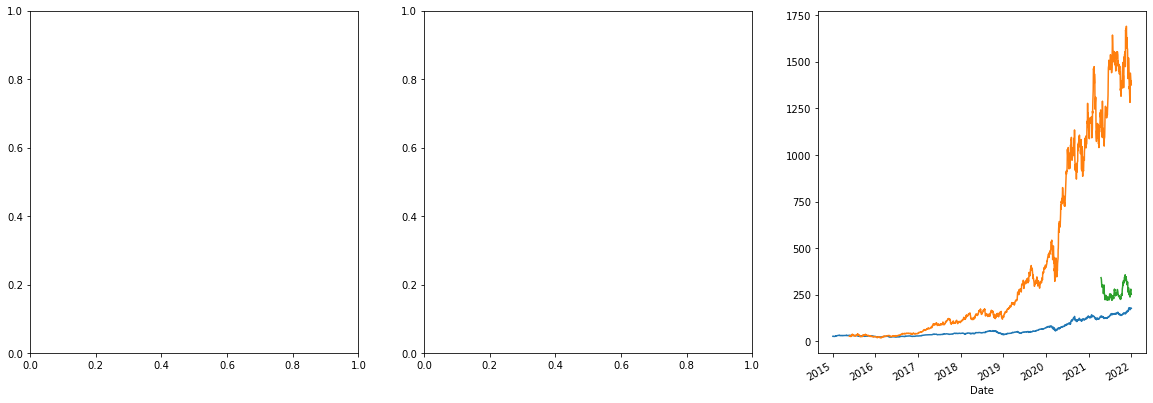

In [45]:
visualize_close_prices([aapl, shop, cb])

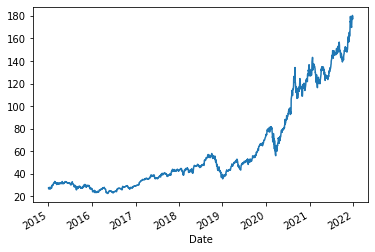

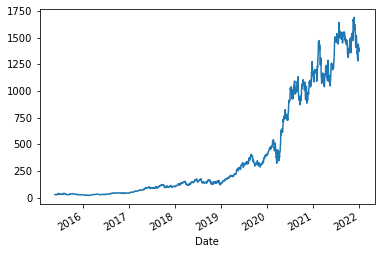

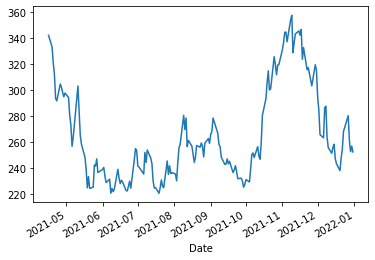

In [19]:
visualize_close_prices(aapl)
visualize_close_prices(shop)
visualize_close_prices(cb)

In [ ]:
import matplotlib.pyplot as plt 


In [29]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [31]:
import fastdtw

In [33]:
fastdtw.dtw(x, y, dist=euclidean)

(2.8284271247461903, [(0, 0), (1, 0), (2, 1), (3, 2), (4, 2)])

In [30]:
x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903
